In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [8]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

In [9]:
all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
# participant = all_participants[1]

# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac


In [10]:
SC_mean = pd.DataFrame()
PC_mean = pd.DataFrame()

df_markers = pd.DataFrame()

for i,v in enumerate(all_participants): 
    participant = v
    
    folder = path + participant +'/'
    
    df_ = pd.read_csv(folder+ participant + '_' + epoch_type + '_all_marker.csv', index_col = 0)
    df_['participant'] = i
    df_markers = df_markers.append(df_)


In [15]:
df_markers.groupby(['probe', 'mind']).count()

wSMI   p_e     k     b  b_n     g  g_n     t  t_n     d  d_n  \
probe mind                                                                    
PC    dMW       171   171   171   171    0   171    0   171    0   171    0   
      on-task   386   386   386   386    0   386    0   386    0   386    0   
      sMW       164   164   164   164    0   164    0   164    0   164    0   
SC    dMW      1148  1148  1148  1148    0  1148    0  1148    0  1148    0   
      sMW      1011  1011  1011  1011    0  1011    0  1011    0  1011    0   

               a_n     a  participant  
probe mind                             
PC    dMW        0   171          171  
      on-task    0   386          386  
      sMW        0   164          164  
SC    dMW        0  1148         1148  
      sMW        0  1011         1011

In [21]:
df_agg = df_markers.groupby(['probe', 'mind', 'participant'], as_index = False).agg('mean')
df_melt = df_agg.melt(id_vars = ['probe', 'mind', 'participant'], var_name = 'markers', value_name = 'val')
df_melt

,probe,mind,participant,markers,val
0,PC,dMW,0,wSMI,0.110898
1,PC,dMW,3,wSMI,0.118349
2,PC,dMW,4,wSMI,0.104905
3,PC,dMW,6,wSMI,0.108251
4,PC,dMW,7,wSMI,0.108105
...,...,...,...,...,...
1243,SC,sMW,21,a,-inf
1244,SC,sMW,22,a,-inf
1245,SC,sMW,23,a,-inf
1246,SC,sMW,24,a,-inf


/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/Users/nicobruno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarn

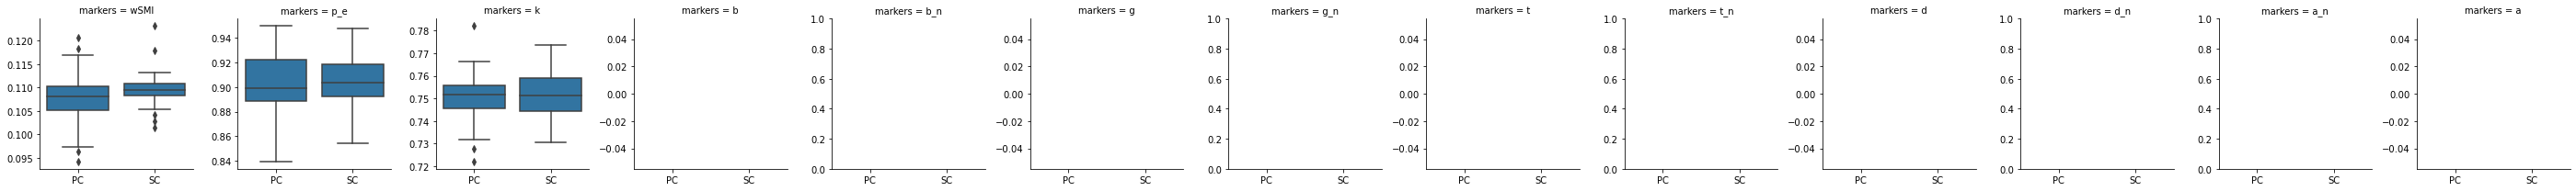

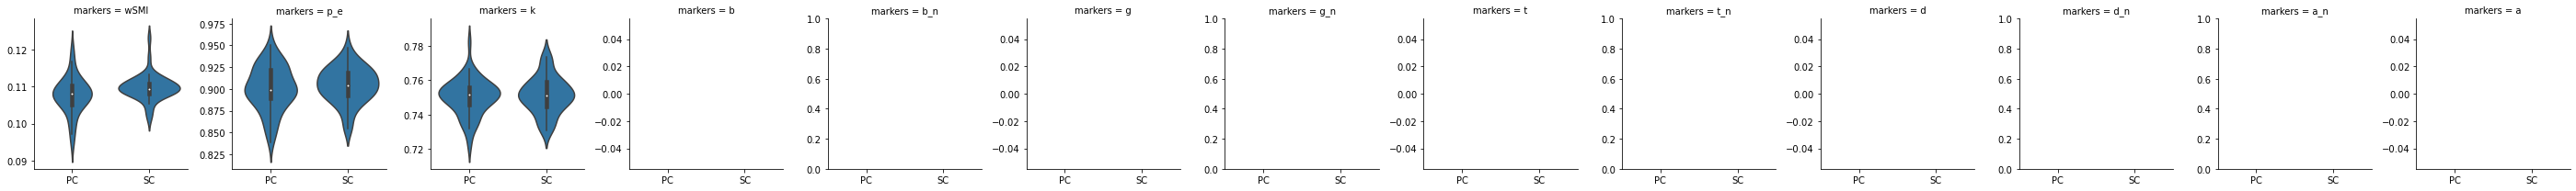

In [24]:
g = sns.FacetGrid(df_melt, col='markers', sharey = False)
g.map_dataframe(sns.boxplot, x='probe', y = 'val')
plt.show()
g = sns.FacetGrid(df_melt, col='markers', sharey = False)
ax = g.map_dataframe(sns.violinplot, x='probe', y = 'val')

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
d_n_PC v.s. d_n_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.690e+02
Using zero_method  wilcox
a_n_PC v.s. a_n_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.740e+02
Using zero_method  wilcox
t_n_PC v.s. t_n_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.460e+02
Using zero_method  wilcox
b_n_PC v.s. b_n_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.270e+02
Using zero_method  wilcox
g_n_PC v.s. g_n_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.730e+02


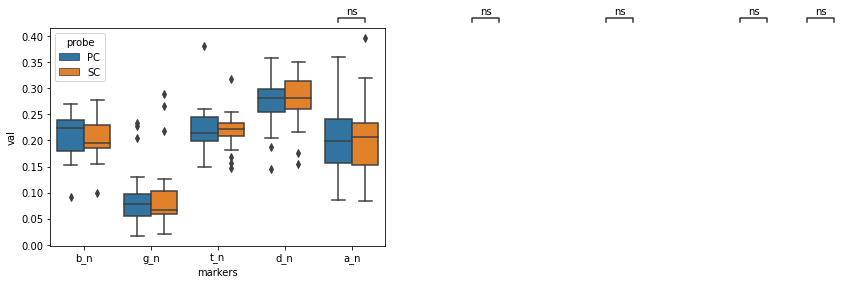

In [88]:
spectral = df_probe[df_probe['markers'].isin(["d_n", 't_n', 'a_n', 'b_n', 'g_n'])]

ax = sns.boxplot(x="markers", y="val", hue='probe', data=spectral);

test_pairs = [(('d_n', 'PC'), ('d_n', 'SC')), (('t_n', 'PC'), ('t_n', 'SC')), 
              (('a_n', 'PC'), ('a_n', 'SC')), (('b_n', 'PC'), ('b_n', 'SC')), 
              (('g_n', 'PC'), ('g_n', 'SC'))]

add_stat_annotation(ax, data=df_probe, x="markers", y="val", hue='probe', 
                                   box_pairs=test_pairs,
                                   test='Wilcoxon', text_format='star',
                                   loc='outside', verbose=2)

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
k_PC v.s. k_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.909e-01 stat=1.240e+02


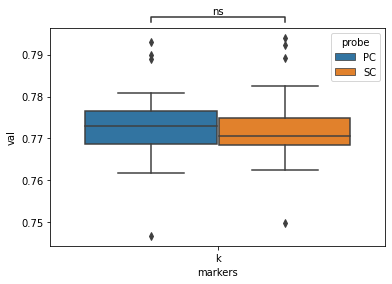

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
p_e_PC v.s. p_e_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.539e-01 stat=1.390e+02


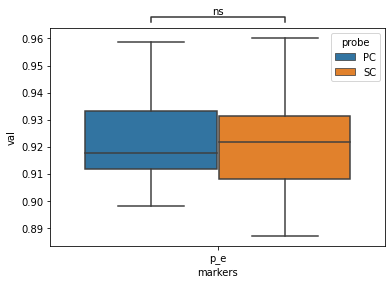

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
wSMI_PC v.s. wSMI_SC: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.506e-01 stat=1.520e+02


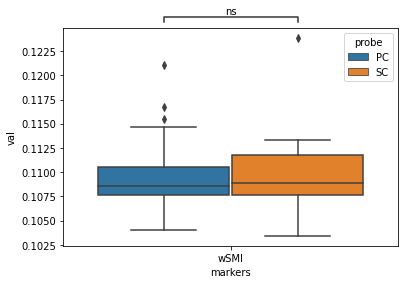

In [86]:
markers = ['k', 'p_e', 'wSMI']

for m in markers:
    df_ = df_probe[df_probe['markers'] == m]
    
    ax = sns.boxplot(x="markers", y="val", hue='probe', data=df_)
    
    add_stat_annotation(ax, data=df_, x="markers", y="val", hue='probe', 
                                   box_pairs=[((m, 'PC'), (m, 'SC'))],
                                   test='Wilcoxon', text_format='star',
                                   loc='outside', verbose=2)
    plt.show()